# Projeto de Regressão Logística


Neste projeto estaremos trabalhando com um conjunto de dados falso de publicidade, indicando se um usuário de internet específico clicou ou não em uma propaganda. Vamos tentar criar um modelo que preveja se clicará ou não em um anúncio baseado nos recursos desse usuário.

Este conjunto de dados contém os seguintes recursos:

* 'Daily Time Spent on Site': tempo no site em minutos.
* 'Age': idade do consumidor.
* 'Area Income': Média da renda do consumidor na região.
* 'Daily Internet Usage': Média em minutos por di que o consumidor está na internet.
* 'Linha do tópico do anúncio': Título do anúncio.
* 'City': Cidade do consumidor.
* 'Male': Se o consumidor era ou não masculino.
* 'Country': País do consumidor.
* 'Timestamp': hora em que o consumidor clicou no anúncio ou janela fechada.
* 'Clicked on Ad'': 0 ou 1 indicam se clicou ou não no anúncio.

## Importar bibliotecas

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Obter dados


In [ ]:
ad_data = pd.read_csv('advertising.csv')

In [ ]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [ ]:
ad_data.describe(include='O')

,Ad Topic Line,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,1000
top,Cloned 5thgeneration orchestration,Lisamouth,France,2016-03-27 00:53:11
freq,1,3,9,1


## Análise de dados exploratória



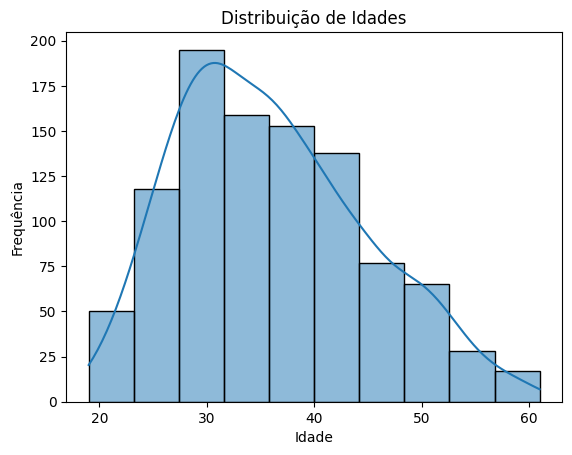

In [ ]:
# Criando o histograma da coluna Age
sns.histplot(data=ad_data, x='Age', bins=10, kde=True)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

<Axes: >

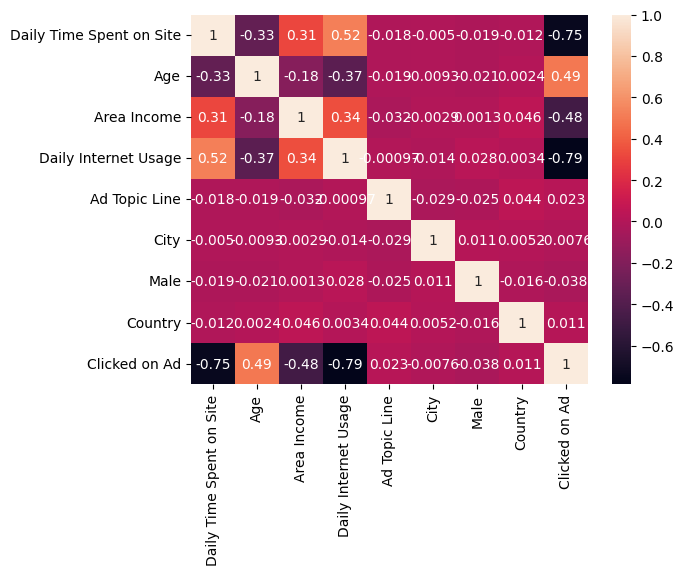

In [ ]:
#Mapa de calor com a correlação entre as colunas
sns.heatmap(ad_data.corr(numeric_only=True), annot =True)

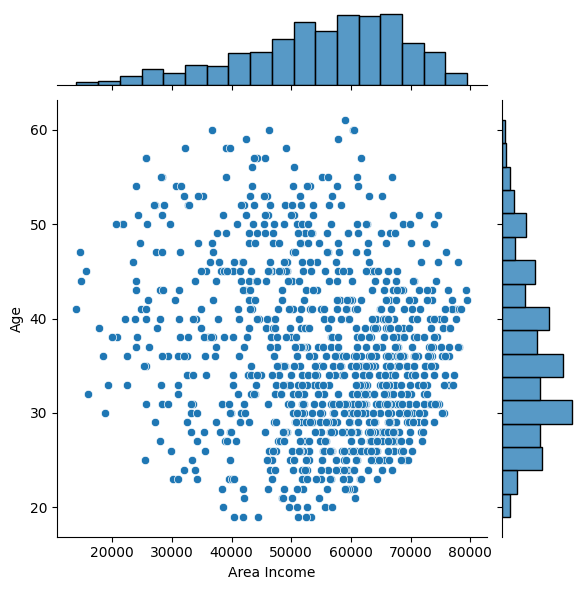

In [ ]:
#Joinplot mostrando "Area Income" versus "Age"**
sns.jointplot(x='Area Income',y='Age',data=ad_data)

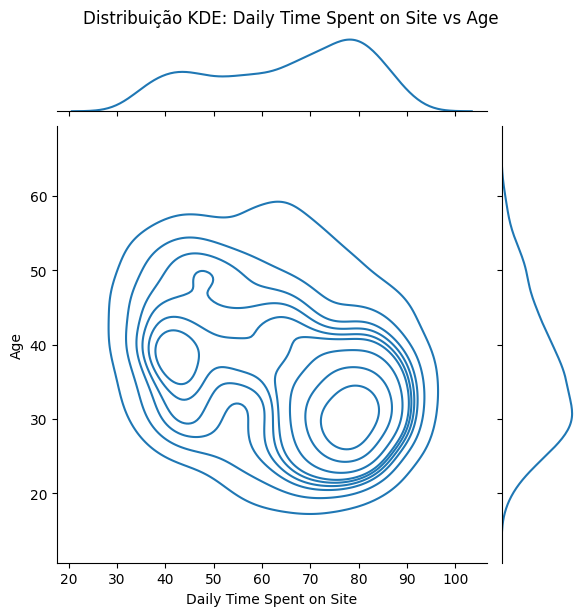

In [ ]:
# Criando o jointplot mostrando as distribuições KDE
sns.jointplot(x='Daily Time Spent on Site', y='Age', data=ad_data, kind='kde')
plt.suptitle('Distribuição KDE: Daily Time Spent on Site vs Age', y=1.02)
plt.show()

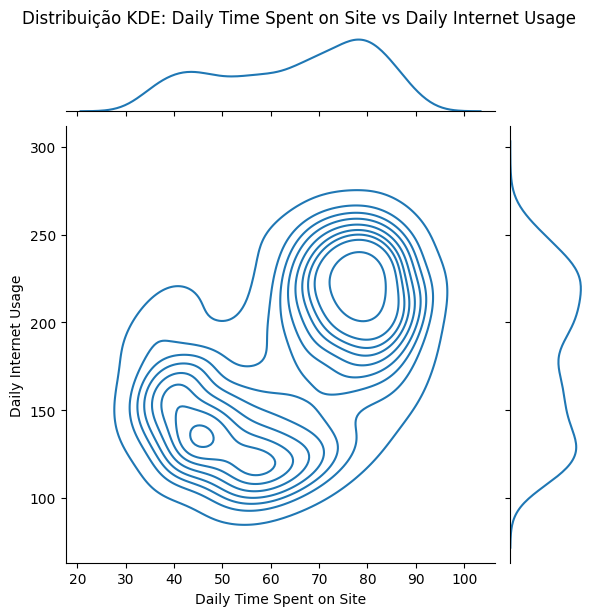

In [ ]:
# Criando o jointplot mostrando as distribuições KDE
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, kind='kde')
plt.suptitle('Distribuição KDE: Daily Time Spent on Site vs Daily Internet Usage', y=1.02)
plt.show()

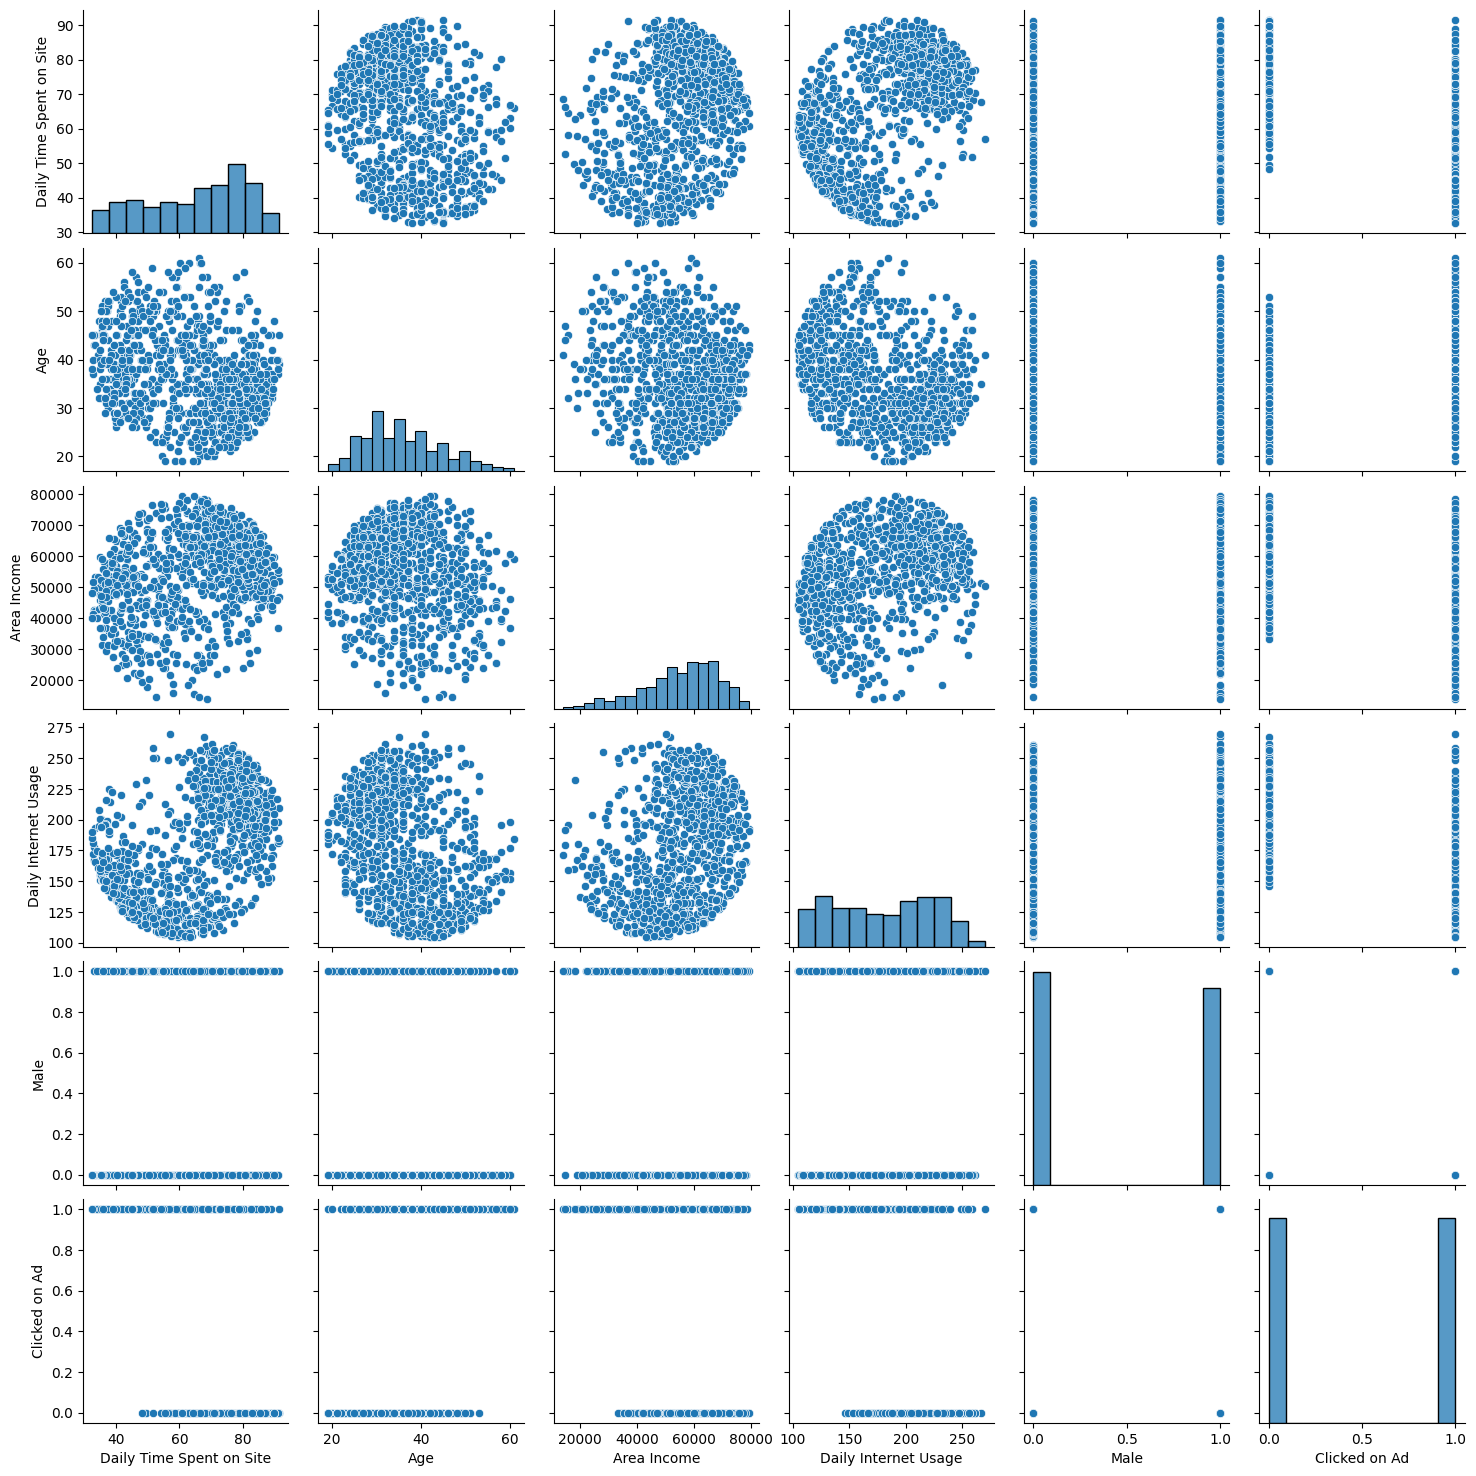

In [ ]:
#Verificando as correlações entre todas as colunas
sns.pairplot(ad_data)


# Regressão Logística


In [ ]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
#Conversão de valores categóricos para numéricos usando o LabelEncoder'

from sklearn.preprocessing              import LabelEncoder

#Chamamos a função LabelEncoder e atribuimos à variável le
le_nome_da_coluna = LabelEncoder()

# Converte todos os valores textuais para numéricos nas colunas
ad_data['Ad Topic Line'] = le_nome_da_coluna.fit_transform(ad_data['Ad Topic Line'])
ad_data['City'] = le_nome_da_coluna.fit_transform(ad_data['City'])
ad_data['Country'] = le_nome_da_coluna.fit_transform(ad_data['Country'])
ad_data['Clicked on Ad'] = le_nome_da_coluna.fit_transform(ad_data['Clicked on Ad'])

# Visualiza os valores categóricos
le_nome_da_coluna.classes_

array([0, 1])

In [ ]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,91,961,0,215,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,464,903,1,147,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,566,111,0,184,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,903,939,1,103,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,766,805,0,96,2016-06-03 03:36:18,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = ad_data.drop('Clicked on Ad', axis = 1)
X = ad_data.drop('Timestamp', axis = 1)
y = ad_data[['Clicked on Ad']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#Normalizando os dados
# Criando uma instância do normalizador
normalizador = MinMaxScaler()

# Normalizando o X_train e aprende quais são os valores mínimos e máximos de cada coluna de X
X_train = normalizador.fit_transform(X_train)

# Normalizando o X_test com os valores mínimos e máximos de cada coluna de X do X_train
X_test = normalizador.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression(n_jobs = -1)
logmodel.fit(X_train,y_train)

LogisticRegression(n_jobs=-1)

## Previsões e avaliações


In [ ]:
y_pred = logmodel.predict(X_test)

**Criandp um relatório de classificação para o modelo.**

In [ ]:
from sklearn.metrics                    import classification_report, confusion_matrix

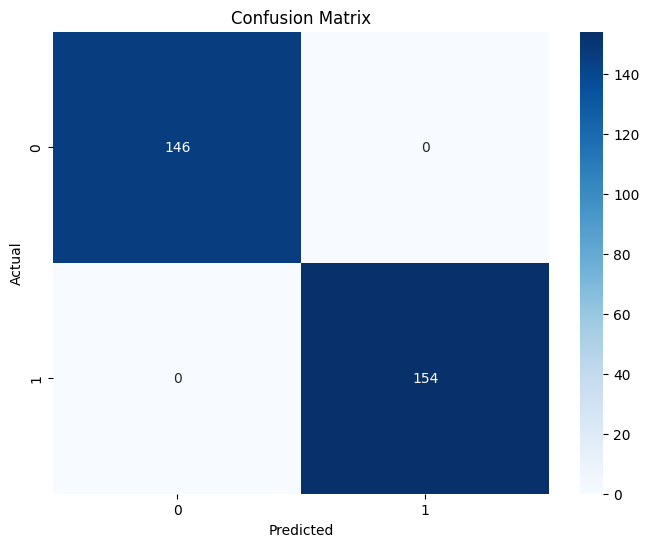

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       154

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
#Função para avaliar modelos de classificação

def avaliar_model(y_test, y_pred):
    # Criando a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plotando a matriz de confusão com um heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Exibindo o classification report
    print(classification_report(y_test, y_pred))


avaliar_model(y_test, y_pred)